In [16]:
# Nice notebook environment
%matplotlib inline
from IPython.display import display

# Importing numpy
import numpy as np
from numpy import *

# Importing matplotlib for graphics and fixing the default size of plots
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # para colores en las gráficas
from matplotlib.ticker import AutoMinorLocator

matplotlib.rcParams['mathtext.fontset']='cm'
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (10,8)

# In case we need sympy
from sympy import init_printing
init_printing(use_latex=True)

import tarfile   # para tratar los archivos .tar
import glob      # para buscar directorios

In [3]:
#my_tar = tarfile.open('dsgdb9nsd.xyz.tar')  #my_tar.tar.gz
#my_tar.extractall('C:/Users/Portatil/Documents/Máster/TFM/Trabajo/1_Base_Datos/Ficheros_xyz')
#my_tar.close()

In [4]:
### Primero leemos los archivos para obtener los histogramas ###

dipolar_mom = []    # momento dipolar
gap = []            # gap
energy_0K = []      # energía a 0 Kelvin


files_directories = glob.glob('./Ficheros_xyz/dsgdb9nsd_*.xyz')  # obtenemos un array que guarda la dirección 
#print(files_directories[0])                                                         # de todos los ficheros

for i in range (0,133884):
  
    file = open(files_directories[i], 'r')   #abrimos el archivo
    datos = file.readlines()   # generemos un array y en cada posición guarda una línea con caracteres
    properties = datos[1].split()   # separamos los elementos de la línea 2 (ahí están las props a leer)
    
    n_atoms = float(datos[0])           # guardamos la columna que sea casteando a float
    dipolar_mom.append(float(properties[5]))   
    gap.append(float(properties[9]))
    energy_0K.append(float(properties[12])/n_atoms)

#print("tamaño:")
#print(np.shape(datos))
#print("array:")
#print(gap)

histo_dipolar_mom = np.array(dipolar_mom)  # obtenemos un numpy.array para trabajar después
histo_gap = np.array(gap)
histo_energy_0K = np.array(energy_0K)

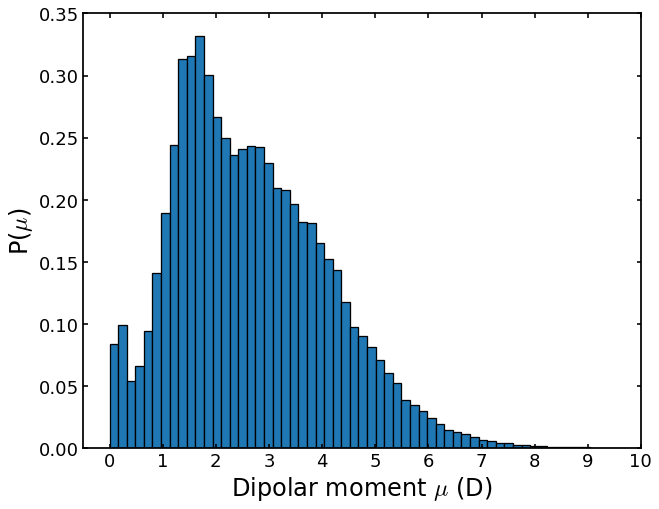

In [4]:
### Histogramas para el momento dipolar, gap y energía interna a 0 K  ###

fig, ax = plt.subplots()

ax.spines['left'].set_linewidth(1.75)    #para cambiar el marco
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)
ax.spines['bottom'].set_linewidth(1.75)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)  #para las marcas

ax.set_xlabel(r'Dipolar moment $\mu$ (D)', fontdict = {'fontsize':24, 'color':'k'})
ax.set_ylabel(r'P($\mu$)', fontdict = {'fontsize':24, 'color':'k'})
ax.set_xlim([-0.5,8.5])
ax.set_ylim([0.,0.35])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
#ax.set_yticks([1.6,1.7,1.8,1.9,2,2.1])


ax.hist(histo_dipolar_mom, bins = 65, range=[0, 10.5], density = True, ec = 'k', linewidth=1.3)
# edgecolor (ec) y facecolor (fc) para las barras
# alpha = 0.5 cambia la transparencia
# rwidth= 0.7 cambia la separacion entre barras. Cada barra ocupa el 70% del ancho del bin, el resto se queda hueco

#plt.legend(bbox_to_anchor=(0.5,0.975), loc='upper left', fontsize=21, borderaxespad=0.)
plt.show()
#plt.savefig('dipolar_moment(1).pdf',bbox_inches='tight')

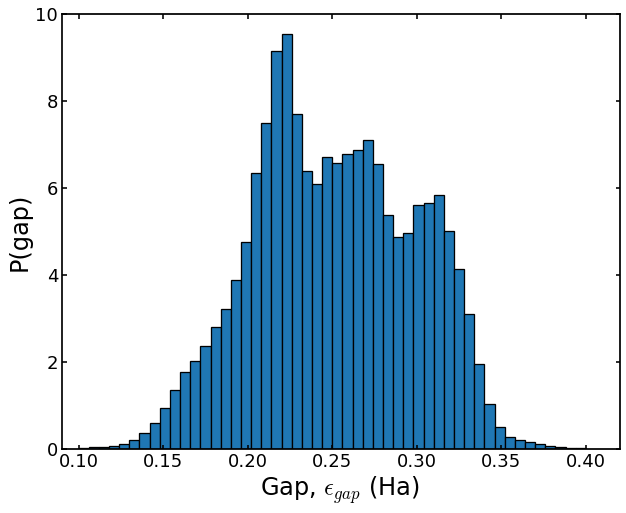

In [5]:
fig, ax = plt.subplots()

ax.spines['left'].set_linewidth(1.7)    #para cambiar el marco
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)
ax.spines['bottom'].set_linewidth(1.75)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)  #para las marcas

ax.set_xlabel(r'Gap, $\epsilon_{gap}$ (Ha) ', fontdict = {'fontsize':24, 'color':'k'})
ax.set_ylabel(r'P(gap)', fontdict = {'fontsize':24, 'color':'k'})
ax.set_xlim([0.09,0.42])
ax.set_ylim([0.,10.])
#ax.set_xticks([0,1,2,3,4,5,6,7,8])
#ax.set_yticks([1.6,1.7,1.8,1.9,2,2.1])

ax.hist(histo_gap, bins = 50, range=[0.1, 0.4], density = True, ec = 'k', linewidth=1.3)

#plt.legend(bbox_to_anchor=(0.5,0.975), loc='upper left', fontsize=21, borderaxespad=0.)
plt.show()
#plt.savefig('gap(1).pdf',bbox_inches='tight')

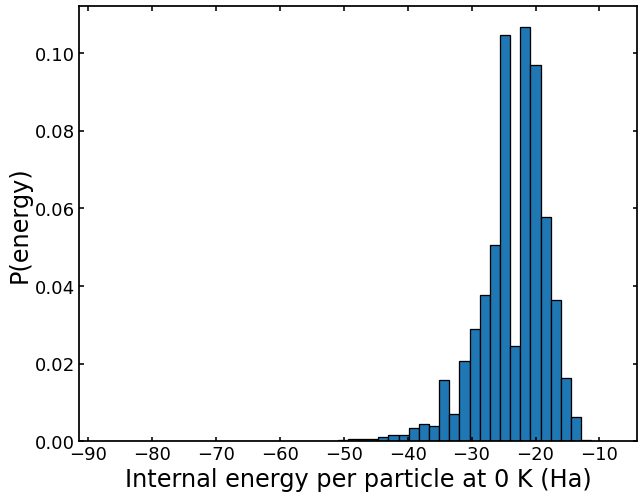

In [6]:
fig, ax = plt.subplots()

ax1.spines['left'].set_linewidth(1.75)    #para cambiar el marco
ax1.spines['right'].set_linewidth(1.75)
ax1.spines['top'].set_linewidth(1.75)
ax1.spines['bottom'].set_linewidth(1.75)

ax1.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)  #para las marcas

ax1.set_xlabel(r'Internal energy per particle at 0 K (Ha)', fontdict = {'fontsize':24, 'color':'k'})
ax1.set_ylabel(r'P(energy)', fontdict = {'fontsize':24, 'color':'k'})
#ax.set_xlim([-600,-200])
#ax.set_ylim([0.,0.18])
#ax.set_xticks([0,1,2,3,4,5,6,7,8])
#ax.set_yticks([1.6,1.7,1.8,1.9,2,2.1])

ax1.hist(histo_energy_0K, bins = 50, density = True, ec = 'k', linewidth=1.3)
#, range=[-650, -200]
#plt.legend(bbox_to_anchor=(0.5,0.975), loc='upper left', fontsize=21, borderaxespad=0.)

fig, ax = plt.subplots()

ax.spines['left'].set_linewidth(1.75)    #para cambiar el marco
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)
ax.spines['bottom'].set_linewidth(1.75)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)  #para las marcas

ax.set_xlabel(r'Dipolar moment $\mu$ (D)', fontdict = {'fontsize':24, 'color':'k'})
ax.set_ylabel(r'P($\mu$)', fontdict = {'fontsize':24, 'color':'k'})
ax.set_xlim([-0.5,8.5])
ax.set_ylim([0.,0.35])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
#ax.set_yticks([1.6,1.7,1.8,1.9,2,2.1])


ax.hist(histo_dipolar_mom, bins = 65, range=[0, 10.5], density = True, ec = 'k', linewidth=1.3)


plt.show()
#plt.savefig('energy_part_0K.pdf',bbox_inches='tight')

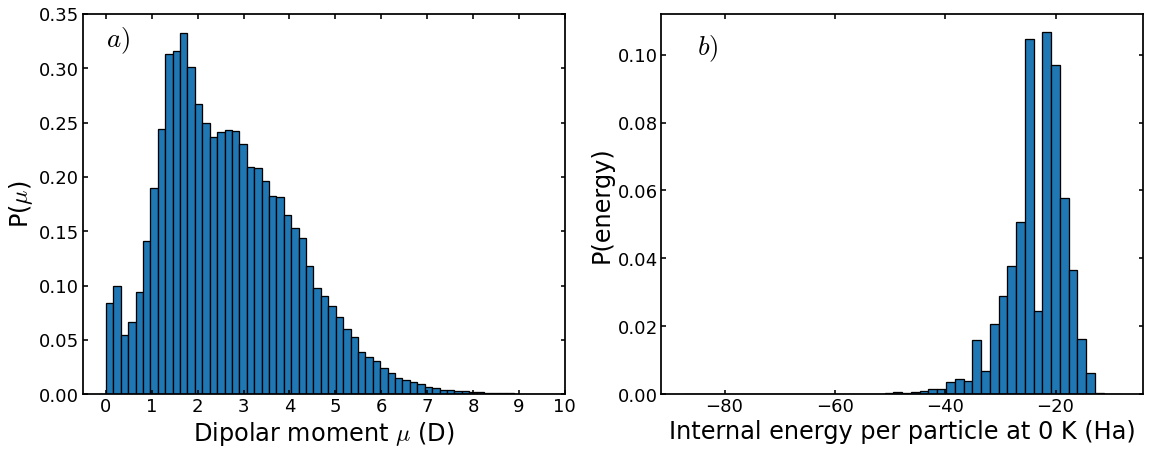

In [59]:
fig = plt.figure(figsize=(19,7))


ax1 = fig.add_subplot(121)

ax1.spines['left'].set_linewidth(1.75)    #para cambiar el marco
ax1.spines['right'].set_linewidth(1.75)
ax1.spines['top'].set_linewidth(1.75)
ax1.spines['bottom'].set_linewidth(1.75)

ax1.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)  #para las marcas

ax1.set_xlabel(r'Dipolar moment $\mu$ (D)', fontdict = {'fontsize':24, 'color':'k'})
ax1.set_ylabel(r'P($\mu$)', fontdict = {'fontsize':24, 'color':'k'})
ax1.text(0,0.32,"$a)$", fontsize=27)
ax1.set_xlim([-0.5,8.5])
ax1.set_ylim([0.0,0.35])
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])

ax1.hist(histo_dipolar_mom, bins = 65, range=[0, 10.5], density = True, ec = 'k', linewidth=1.3)


ax2 = fig.add_subplot(122)

ax2.spines['left'].set_linewidth(1.75)
ax2.spines['right'].set_linewidth(1.75)
ax2.spines['top'].set_linewidth(1.75)
ax2.spines['bottom'].set_linewidth(1.75)

ax2.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)  #para las marcas

ax2.set_xlabel(r'Internal energy per particle at 0 K (Ha)', fontdict = {'fontsize':24, 'color':'k'})
ax2.set_ylabel(r'P(energy)', fontdict = {'fontsize':24, 'color':'k'})
ax2.text(-85,0.1,"$b)$", fontsize=27)
#ax2.set_ylim([-0.,0.12])

ax2.hist(histo_energy_0K, bins = 50, density = True, ec = 'k', linewidth=1.3)
#, range=[-650, -200]
#plt.legend(bbox_to_anchor=(0.5,0.975), loc='upper left', fontsize=21, borderaxespad=0.)



#plt.show()
plt.savefig('DB.pdf',bbox_inches='tight')